In [1]:
### visualise education variables!

In [2]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



Toggle code

In [3]:
BES_label_list["2017"]

{'finalserialno': 'Final Serial Number',
 'serial': 'Respondent Serial Number',
 'a01': 'A1: Most important issue',
 'a02': 'Best party on most important issue',
 'a03': 'Interest in politics',
 'm02_1': "Politicians don't care what people like me think",
 'm02_2': 'It is often difficult for me to understand what is going on in government and po',
 'm02_3': 'People like me have no say in what government does.',
 'm02_4': "The main political parties in Britain don't offer voters real choices in electio",
 'm02_5': 'Parties and politicians in the UK are more concerned with fighting each other th',
 'm02_6': 'Politicians ignore the issues I really care about',
 'b01': 'B1 Talking with people about the general election on June 8th, we have found tha',
 'b02': 'B2 Which party did you vote for in the general election?',
 'b04': 'B4 If you had voted, which party would you probably have voted for?',
 'b05': 'B5 How did you cast your vote in the general election on June 8th?',
 'b0601': 'The pa

In [4]:
# 'wt_vote_f2f': 'VEP Self-reported vote weight (face-to-face only)'
temp = BES_df_list["2019"][["b02","u05","wt_vote_f2f"]]
round(pd.crosstab(temp["b02"],temp["u05"],values=temp["wt_vote_f2f"],aggfunc=sum,normalize='index'),3)*100

u05,Prefer not to say/Refuse,Don't know,Did not vote,Labour,Conservative,Liberal Democrat,Scottish National Party,Plaid Cymru,Green Party,United Kingdom Independence Party (UKIP),British National Party (BNP),Other,Not eligible/too young to vote,Spoilt ballot paper,Brexit,Independent
b02,,,,,,,,,,,,,,,,
Prefer not to say/Refuse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Don't know,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Labour Party,0.0,2.2,7.4,73.4,4.0,6.1,1.1,0.3,2.9,0.0,0.0,0.0,2.4,0.0,0.0,0.1
Conservative Party,0.2,2.8,6.5,7.6,69.2,4.1,0.2,0.1,0.9,4.7,0.3,0.1,2.9,0.2,0.3,0.0
Liberal Democrats,0.9,3.2,5.0,16.8,20.6,47.2,1.1,0.2,2.4,0.0,0.0,0.0,2.4,0.0,0.0,0.0
Scottish National Party,0.0,0.0,0.9,3.1,2.3,2.1,84.1,0.0,0.6,0.0,0.0,0.0,6.9,0.0,0.0,0.0
Plaid Cymru,0.0,0.0,0.0,0.0,0.0,23.0,0.0,66.5,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0
Green Party,0.0,7.0,19.9,24.3,2.1,14.4,0.5,0.8,28.5,0.0,0.0,0.0,0.0,2.4,0.0,0.0
United Kingdom Independence Party (UKIP),0.0,78.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.7,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 'wt_vote_f2f': 'VEP Self-reported vote weight (face-to-face only)'
temp = BES_df_list["2017"][["b02","u05","wt_vote"]]
round(pd.crosstab(temp["b02"],temp["u05"],values=temp["wt_vote"],aggfunc=sum,normalize='index'),3)*100

u05,Refused,Don`t know,Did not vote,Labour,Conservative,Liberal Democrat,Scottish National Party,Plaid Cymru,Green Party,United Kingdom Independence Party (UKIP),British National Party (BNP),Other,Not eligible/too young to vote
b02,,,,,,,,,,,,,
Refused,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Don`t know,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None/No party,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Labour,0.0,1.5,8.1,70.5,7.6,5.0,0.8,0.2,2.4,1.5,0.1,0.3,1.9
Conservatives,0.0,1.3,3.2,5.2,78.7,3.4,0.1,0.0,0.2,6.8,0.0,0.0,1.0
Liberal Democrats,0.0,4.9,3.8,11.9,20.8,53.3,0.5,0.0,1.7,0.0,0.9,0.3,1.8
Scottish National Party (SNP),0.0,2.8,1.4,5.4,0.0,0.0,90.4,0.0,0.0,0.0,0.0,0.0,0.0
Plaid Cymru,0.0,2.7,0.0,17.6,18.9,0.0,0.0,58.8,0.0,0.0,0.0,1.9,0.0
Green Party,0.0,7.5,6.6,13.0,16.1,13.9,0.0,0.0,19.9,3.1,0.0,2.4,17.5


In [6]:
search(f2f_harmonised,"vote")

vote                    52689
vote_simple             51938
harmonised_voted        52281
vote_complete           52731
vote_complete_simple    52731
dtype: int64

In [7]:
f2f_harmonised["vote_complete"]

index
0       DNV
1       DNV
2       LAB
3       DNV
4       DNV
       ... 
2917     TY
2918     TY
2919     TY
2920    LAB
2921     TY
Name: vote_complete, Length: 52731, dtype: object

In [19]:

def full_form_birth_year(x):
    if pd.isnull(x):
        return np.nan
    elif x>60:
        return 1800 + x
    else:
        return 1900 + x
    
def rep_char(x):
    return x.replace('[', '{').replace(']', '}').replace('<', '{').replace('>', '}')

list_of_scale_harm_vars = ["Age","kind_of_scool","year_past_min_sch_leave_age"]

# def replace_var_names(labels):
    # varname_replace_dict = {}
    # replace_char_dict = {"[":"{","]":"}"}
    # for col in df_simp.columns:
        # if np.any([x in col for x in generic_cols]) or (col in list_of_scale_harm_vars):
            # # 'age' is a problem as a common word component
            # varname_replace_dict[col] = rep_char(col)
            
        # elif "|" not in col:
            # varname_replace_dict[col] = rep_char(labels[col])
        # elif len(col.split("|"))==2:
            # varname_replace_dict[col] = rep_char(labels[col.split("|")[0]])\
                # +"("+ rep_char(col.split("|")[1]) +")"
        # if varname_replace_dict[col]=="":
            # varname_replace_dict[col] = rep_char(col)
    # return varname_replace_dict

def rep_char(x):
    return x.replace('[', '{').replace(']', '}').replace('<', '{').replace('>', '}')

def replace_var_names(labels,df_simp):
    varname_replace_dict = {}
    replace_char_dict = {"[":"{","]":"}"}
    for col in df_simp.columns:
        if np.any([x in col for x in generic_cols]) or (col in list_of_scale_harm_vars):
            # 'age' is a problem as a common word component
            varname_replace_dict[col] = rep_char(col)
            
        elif "|" not in col:
            varname_replace_dict[col] = rep_char(labels[col])
        elif len(col.split("|"))==2:
            varname_replace_dict[col] = rep_char(labels[col.split("|")[0]])\
                +"("+ rep_char(col.split("|")[1]) +")"
        if varname_replace_dict[col]=="":
            varname_replace_dict[col] = rep_char(col)
    return varname_replace_dict

global BES_label_list, BES_df_list

def prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=False,
       drop_vars = [],demo_var_only=True,
        multi_class_target=False,dummy_na=True,specific_vars = False, drop_after_dummying = [],
                harmonised_only=False):

    if demo_var_only:
        demo_vars = demo_var_dict[ge]
    elif harmonised_only:
        demo_vars = []
    elif specific_vars:
        demo_vars = specific_vars
    else:
        demo_vars = list(BES_label_list[ge].keys())

#     labels = BES_label_list[ge]
    df = pd.concat([f2f_harmonised[f2f_harmonised["dataset"]==ge][harm_vars],BES_df_list[ge]
                           ],axis=1)
    old_demo_vars = demo_vars.copy()
    demo_vars = demo_vars+harm_vars
    demo_vars = list(set(demo_vars).intersection(df.columns))
    if drop_vars:
        demo_vars = [x for x in demo_vars if x not in drop_vars]
        old_demo_vars = [x for x in old_demo_vars if x not in drop_vars]    

    df_simp = df[demo_vars].copy()

    df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)
    # prep nominal and ordinal as categorical to be dummied
    old_demo_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["nominal","ordinal"]]
    scale_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["scale"]]
        
    if not multi_class_target:
        df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)    
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp = pd.get_dummies(df_simp,prefix_sep='|',dummy_na=dummy_na).drop(target_var_drop_list,axis=1)
        if target_var+"|nan" in df_simp.columns:
            df_simp.loc[df_simp[target_var+"|nan"]==1,var_stub]=np.nan
            df_simp.drop(target_var+"|nan",axis=1,inplace=True,)
    else:
        old_demo_vars = [x for x in old_demo_vars if x !=target_var]
        scale_vars = [x for x in scale_vars if x !=target_var]   
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')        
        df_simp[target_var] = df_simp[target_var].astype('category')
        target_var_drop_list = [x for x in target_var_drop_list if x in df_simp[target_var].cat.categories]
        df_simp[target_var] = df_simp[target_var].cat.remove_categories(target_var_drop_list)        
        all_but_target = [x for x in df_simp.columns if x !=target_var]
        target_temp = df_simp[target_var].copy()
        df_simp = pd.get_dummies(df_simp[all_but_target],prefix_sep='|',dummy_na=dummy_na)
        df_simp[target_temp.name] = target_temp
        

    df_simp = df_simp.rename(columns = replace_var_names( BES_label_list[ge] , df_simp ))  
    
    df_simp = df_simp.drop(drop_after_dummying , axis=1)

    Treatment = var_stub+"_"+ge

    var_list = [var_stub]
    var_stub_list = [var_stub,]
    if not multi_class_target:
        df_simp = df_simp.select_dtypes('number')
        df_simp = df_simp.astype('float')
#     mask = df_simp[var_stub].notnull() & df_simp["wt"].notnull()
    return df_simp

def prep_df(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=False,drop_vars = [],demo_var_only=True,alg=None,
           multi_class_target=False,dummy_na=True, specific_vars = False, drop_after_dummying = [],
           wt_col = "wt", harmonised_only=False):

    # drop drop_var variables from demo_var list
    if demo_var_only:
        demo_vars = demo_var_dict[ge]
    elif harmonised_only:
        demo_vars = []
    elif specific_vars:
        demo_vars = specific_vars
    else:
        demo_vars = list(BES_label_list[ge].keys())
        

#     labels = BES_label_list[ge]
    df = pd.concat([f2f_harmonised[f2f_harmonised["dataset"]==ge][harm_vars],BES_df_list[ge]                            
                           ],axis=1)

    
    old_demo_vars = demo_vars.copy()
    demo_vars = demo_vars+harm_vars
    demo_vars = list(set(demo_vars).intersection(df.columns))
    # drop vars after adding harm/dropping ones not present
    if drop_vars:
        demo_vars = [x for x in demo_vars if x not in drop_vars]    
        old_demo_vars = [x for x in old_demo_vars if x not in drop_vars]    

    df_simp = df[demo_vars].copy()



    # prep nominal and ordinal as categorical to be dummied
    old_demo_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["nominal","ordinal"]]
    scale_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["scale"]]
    
    if not multi_class_target:
        df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)    
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp = pd.get_dummies(df_simp,prefix_sep='|',dummy_na=dummy_na).drop(target_var_drop_list,axis=1)
        if target_var+"|nan" in df_simp.columns:
            df_simp.loc[df_simp[target_var+"|nan"]==1,var_stub]=np.nan
            df_simp.drop(target_var+"|nan",axis=1,inplace=True,)
        eval_metric='rmse'
    else:
        old_demo_vars = [x for x in old_demo_vars if x !=target_var]
        scale_vars = [x for x in scale_vars if x !=target_var]
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp[target_var] = df_simp[target_var].astype('category')
        target_var_drop_list = [x for x in target_var_drop_list if x in df_simp[target_var].cat.categories]
        df_simp[target_var] = df_simp[target_var].cat.remove_categories(target_var_drop_list)
        all_but_target = [x for x in df_simp.columns if x !=target_var]
        target_temp = df_simp[target_var].copy()
        df_simp = pd.get_dummies(df_simp[all_but_target],prefix_sep='|',dummy_na=dummy_na)
        df_simp[target_temp.name] = target_temp
        eval_metric='mlogloss'



    df_simp = df_simp.rename(columns = replace_var_names( BES_label_list[ge] , df_simp ))  
    
    df_simp = df_simp.drop(drop_after_dummying , axis=1)
    
    Treatment = var_stub+"_"+ge

    var_list = [var_stub]
    var_stub_list = [var_stub,]
    
    if not multi_class_target:
        df_simp = df_simp.select_dtypes('number')
        df_simp = df_simp.astype('float')
        

    colname = var_stub
    if target_var_title_pair is not None:
        title = "\n\nMore Likely to "+target_var_title_pair[0]+" <---   ---> More Likely to"+target_var_title_pair[1]
    else:
        title = ""
        
    if wt_col =="wt":
        wt_cols = ["wt"]
        wt_ser = df_simp["wt"]
    else:
        wt_cols = ["wt",wt_col]
        wt_ser = df_simp[wt_col]        
    mask = df_simp[var_stub].notnull() & df_simp[wt_col].notnull()
    
    (explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics)=\
        xgboost_run(subdir=colname,dataset=df_simp[mask].drop(wt_cols,axis=1),
                var_list=var_list,var_stub_list=var_stub_list,
                use_specific_weights=wt_ser[mask],
                min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
                skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
                title = title)
    
    return (explainer, shap_values, train_columns, train_index, alg,output_subfolder)
    
    

In [72]:
f2f_harmonised["LAB"] = (f2f_harmonised["vote_complete"]=="LAB").astype('float')
f2f_harmonised["CON"] = (f2f_harmonised["vote_complete"]=="CON").astype('float').astype('int')
f2f_harmonised["LIB"] = (f2f_harmonised["vote_complete"]=="LIB").astype('float')
f2f_harmonised["DNV"] = (f2f_harmonised["vote_complete"]=="DNV").astype('float')

In [10]:
# f2f_harmonised.loc[f2f_harmonised["dataset"]!=ge,"LAB"] = np.nan

In [36]:
f2f_harmonised["CON"]

index
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2917    0.0
2918    0.0
2919    0.0
2920    0.0
2921    0.0
Name: CON, Length: 52731, dtype: float64

MSE: 0.24, MAE: 0.48, EV: 0.00, R2: -0.00


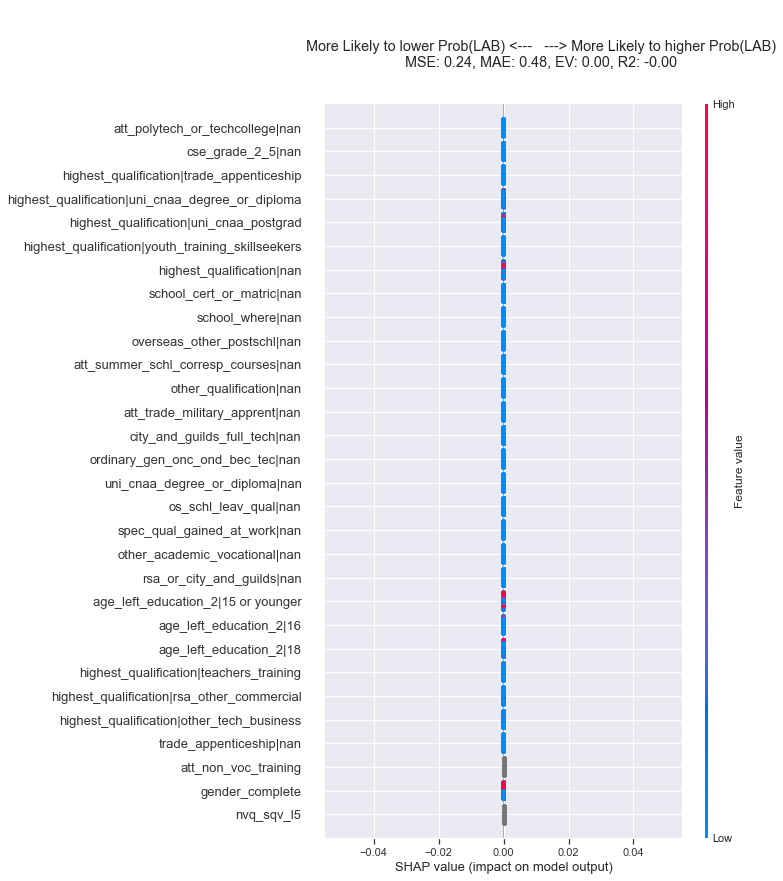

In [198]:
ge = "2019"
generic_cols = f2f_harmonised.columns
harm_vars = ["wt","age","housing_det","inc_det",'gender_complete', 'age_left_education',
       'age_left_education_2', 'age_left_education_3', 'anyQuals',
       'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
       'other_academic_vocational', 'other_tech_business',
       'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
       'trade_appenticeship', 'nursing', 'teachers_training',
       'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
       'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
       'rsa_other_commercial', 'school_cert_or_matric',
       'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
       'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
       'professional_qualification', 'spec_qual_gained_at_work',
       'other_qualification', 'highest_qualification', 'nvq_sqv_l1',
       'nvq_sqv_l2', 'nvq_sqv_l3', 'nvq_sqv_l4', 'nvq_sqv_l5', 'edqual21',
       'att_university', 'att_commercial_training',
       'att_polytech_or_techcollege', 'att_night_school',
       'att_non_voc_training', 'att_other', 'att_art_school',
       'att_college_of_commerce', 'att_teacher_training',
       'att_trade_military_apprent', 'att_tech_college_teacher_nursing',
       'att_tech_or_occ_training', 'att_summer_schl_corresp_courses',
       'att_NoFE', 'att_forces_training', 'school_type', 'school_selective',
       'school_fees', 'school_fees_when', 'school_where', 'school_type_2'
            ]\
            +["CON"]
# "harmonised_voted","bloc_complete",
target_var = "CON"
target_var_replace_dict = {}
target_var_drop_list = []
target_var_title_pair = ["lower Prob(LAB)"," higher Prob(LAB)"]
var_stub = "CON"
min_features = 30
drop_vars = []
multi_class_target=False


alg = get_xgboost_alg(classification_problem=multi_class_target)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder) = prep_df(ge,target_var,target_var_replace_dict,
                                                                                     target_var_drop_list,target_var_title_pair,
        var_stub,harm_vars,min_features,dependence_plots=False,drop_vars=drop_vars,
        demo_var_only=False, harmonised_only=True, alg=alg,multi_class_target=multi_class_target)

# setup df back up
df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
        var_stub,harm_vars,min_features,dependence_plots=False,drop_vars=drop_vars,
        demo_var_only=False, harmonised_only=True,multi_class_target=multi_class_target)
# use fitted algorithm to predict values
inc_pred = alg.predict(df_pred[train_columns])
# income_var_df_sm.loc[income_var_df_sm[ge].isnull(),ge] = pd.Series(inc_pred,index=income_var_df_sm[ge].index).apply(round)[income_var_df_sm[ge].isnull()]

MSE: 0.24, MAE: 0.48, EV: 0.00, R2: -0.00


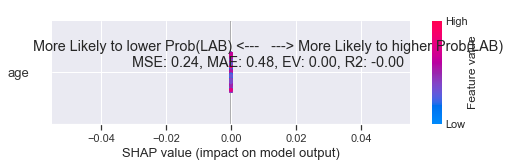

In [202]:
ge = "1964"
generic_cols = f2f_harmonised.columns
harm_vars = ["wt","age",
#              "housing_det","inc_det",'gender_complete',
#              'age_left_education',
#        'age_left_education_2', 'age_left_education_3', 'anyQuals',
#        'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
#        'other_academic_vocational', 'other_tech_business',
#        'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
#        'trade_appenticeship', 'nursing', 'teachers_training',
#        'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
#        'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
#        'rsa_other_commercial', 'school_cert_or_matric',
#        'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
#        'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
#        'professional_qualification', 'spec_qual_gained_at_work',
#        'other_qualification', 'highest_qualification', 'nvq_sqv_l1',
#        'nvq_sqv_l2', 'nvq_sqv_l3', 'nvq_sqv_l4', 'nvq_sqv_l5', 'edqual21',
#        'att_university', 'att_commercial_training',
#        'att_polytech_or_techcollege', 'att_night_school',
#        'att_non_voc_training', 'att_other', 'att_art_school',
#        'att_college_of_commerce', 'att_teacher_training',
#        'att_trade_military_apprent', 'att_tech_college_teacher_nursing',
#        'att_tech_or_occ_training', 'att_summer_schl_corresp_courses',
#        'att_NoFE', 'att_forces_training', 'school_type', 'school_selective',
#        'school_fees', 'school_fees_when', 'school_where', 'school_type_2'
            ]\
            +["CON"]
# "harmonised_voted","bloc_complete",
target_var = "CON"
target_var_replace_dict = {}
target_var_drop_list = []
target_var_title_pair = ["lower Prob(LAB)"," higher Prob(LAB)"]
var_stub = "CON"
min_features = 30
drop_vars = []
multi_class_target=False


alg = get_xgboost_alg(classification_problem=multi_class_target)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder) = prep_df(ge,target_var,target_var_replace_dict,
                                                                                     target_var_drop_list,target_var_title_pair,
        var_stub,harm_vars,min_features,dependence_plots=False,drop_vars=drop_vars,
        demo_var_only=False, harmonised_only=True, alg=alg,multi_class_target=multi_class_target)

# setup df back up
df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
        var_stub,harm_vars,min_features,dependence_plots=False,drop_vars=drop_vars,
        demo_var_only=False, harmonised_only=True,multi_class_target=multi_class_target)
# use fitted algorithm to predict values
inc_pred = alg.predict(df_pred[train_columns])
# income_var_df_sm.loc[income_var_df_sm[ge].isnull(),ge] = pd.Series(inc_pred,index=income_var_df_sm[ge].index).apply(round)[income_var_df_sm[ge].isnull()]

In [194]:
def xgboost_run(title, dataset, var_list,var_stub_list=[], subdir=None, min_features=30, dependence_plots=False , output_folder=".."+os.sep+"Output"+os.sep,Treatment="default",
                use_specific_weights = None, automatic_weights_from_wave_no = False, alg = None,verbosity=1,skip_bar_plot=False,
                eval_metric = ['rmse'],minimum_sample=50,dont_stop_on_sample_size_err=False,print_shap_chart=True,plot_validation=False,
                threshold=.1):
    if alg is None:
        alg = get_xgboost_alg()
        alg.verbosity=verbosity
    if verbosity>=1:
        verbose=True
    else:
        verbose=False
    # global BES_Panel
    # for target_var,base_var in zip(var_list,base_list):
    treatment_subfolder = create_subdir(output_folder,Treatment)

    
    for target_var in var_list:
        if automatic_weights_from_wave_no:
            wave_no = get_wave_no( target_var )
            weight_var = num_to_weight[wave_no]    
            print( target_var, wave_no )

        target = create_target(dataset,target_var)
        mask   = target.notnull()
        if optional_mask & automatic_weights_from_wave_no:
            mask = mask&optional_mask_fn(wave_no)
        else:
            mask = mask&optional_mask_fn()
        target = target[mask]

        if sum(mask) < minimum_sample:
            print("Skipping - sample size beneath minimum: ",minimum_sample)
            skipping = True
            if not dont_stop_on_sample_size_err:
                raise Exception("fgflgf")
            continue
        skipping=False

        train = create_train(dataset,drop_other_waves,var_stub_list,mask,target_var)

        if subdir is None:
            output_subfolder = create_subdir(treatment_subfolder,target_var)
        else:
            output_subfolder = create_subdir(treatment_subfolder,subdir)

        if use_specific_weights is not None:
            sample_weights = use_specific_weights[mask].fillna(use_specific_weights[mask].median())




        elif automatic_weights_from_wave_no:
            sample_weights = weights[weight_var][mask]
            print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
            sample_weights = sample_weights.fillna(sample_weights.median())
        
        else:
            sample_weights = None
    #         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, sample_weights )
    #         # fit to full dataset at non-overfitting level
    #         alg.fit(train, target, verbose = True, sample_weight = sample_weights)        
    #     else:

        if target.dtype.name == 'category':
            (ACC,  F1, alg_best_iteration) = get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = verbose,
                                      sample_weights=sample_weights,plot_validation=plot_validation)
            pd.Series([ACC,  F1,  alg_best_iteration],index = ["ACC",  "F1", "alg_best_iteration"]).to_csv(output_subfolder+"scores.csv")
           
        
        else:

            (MSE, MAE, EV, R2, alg_best_iteration) = get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = verbose,
                                      sample_weights=sample_weights,plot_validation=plot_validation)
            pd.Series([MSE, MAE, EV, R2, alg_best_iteration],index = ["MSE", "MAE", "EV", "R2", "alg_best_iteration"]).to_csv(output_subfolder+"scores.csv")
#         raise Exception                            
        # fit to full dataset at non-overfitting level
        alg.fit(train, target, verbose = verbose, sample_weight = sample_weights)


    #################

        explainer = shap.TreeExplainer(alg)
        shap_values = explainer.shap_values(train)
        
#         shap_values = shap.TreeExplainer(alg).shap_values(train);

        shap_problem = np.isnan(np.abs(shap_values).mean(0)).any()
        if shap_problem:
            print("hit problem!")
            shap_values = shap.TreeExplainer(alg).shap_values(train, approximate=True);

        pickle.dump( explainer, open( output_subfolder+"explainer.pkl", "wb" ) )
        pickle.dump( explainer, open( output_subfolder+"alg.pkl", "wb" ) )

        if target.dtype.name == 'category':
            subtitle = "ACC: %.2f, F1: %.2f" % (ACC, F1)
            metrics = (ACC, F1)
        else:
            subtitle = "MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2)
            metrics = (MSE, MAE, EV, R2)
            
        
            
        if target.dtype.name == 'category':
            multiclass = True
            class_names = list(target.cat.categories)
        else:
            multiclass = False
            class_names = None
            
        if print_shap_chart:
            shap_outputs(shap_values, train, target_var, output_subfolder, threshold = threshold,
                     min_features = min_features, title=title+"\n"+subtitle,
                     dependence_plots=dependence_plots,skip_bar_plot=False,multiclass=multiclass,class_names=class_names)        

    if skipping:
        return (None,None,None,None,None,None,None)
    else:
        return (explainer, shap_values, train.columns, train.index, alg,output_subfolder,metrics)



In [132]:
df_pred.drop("temp",axis=1,inplace=True)

In [102]:
# df_pred["temp"] = df_pred["CON"]+.3

[0]	validation_0-rmse:0.49326	validation_1-rmse:0.49555
[1]	validation_0-rmse:0.48796	validation_1-rmse:0.49246
[2]	validation_0-rmse:0.48394	validation_1-rmse:0.49057
[3]	validation_0-rmse:0.48107	validation_1-rmse:0.48973
[4]	validation_0-rmse:0.47921	validation_1-rmse:0.48979
[5]	validation_0-rmse:0.47824	validation_1-rmse:0.49063
[6]	validation_0-rmse:0.47803	validation_1-rmse:0.49212
[7]	validation_0-rmse:0.47849	validation_1-rmse:0.49417
[8]	validation_0-rmse:0.47951	validation_1-rmse:0.49668
[9]	validation_0-rmse:0.48101	validation_1-rmse:0.49955
[10]	validation_0-rmse:0.48290	validation_1-rmse:0.50273
[11]	validation_0-rmse:0.48512	validation_1-rmse:0.50613
[12]	validation_0-rmse:0.48760	validation_1-rmse:0.50971
[13]	validation_0-rmse:0.49028	validation_1-rmse:0.51342
[14]	validation_0-rmse:0.49313	validation_1-rmse:0.51721
[15]	validation_0-rmse:0.49610	validation_1-rmse:0.52105
[16]	validation_0-rmse:0.49915	validation_1-rmse:0.52490
[17]	validation_0-rmse:0.50225	validation

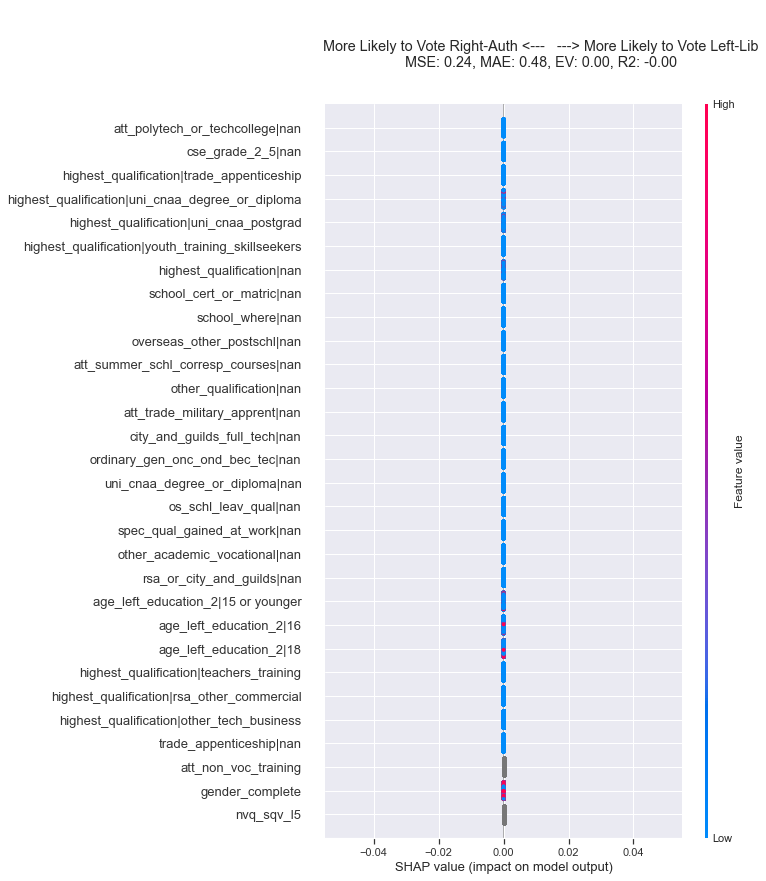

In [201]:
# %%time

var_stub = "CON"
Treatment = var_stub+"_"+ge

var_list = [var_stub]
var_stub_list = [var_stub,]
# df_pred = df_pred.astype('float')
mask = df_pred[var_stub].notnull() & df_pred["wt"].notnull()
colname = var_stub
(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics)= xgboost_run(subdir=colname,dataset=df_pred[mask].drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_pred["wt"][mask],
            min_features = min(df_pred.shape[1]-1,30),
            title = "\n\nMore Likely to Vote Right-Auth <---   ---> More Likely to Vote Left-Lib")

In [191]:
# %debug

In [126]:

alg = get_xgboost_alg()

In [125]:
df_pred

,age,wt,CON,temp
0,34.0,0.926940,0.0,0.3
1,45.0,NaN,0.0,0.3
2,33.0,0.920836,0.0,0.3
3,22.0,1.197730,0.0,0.3
4,35.0,1.979724,0.0,0.3
...,...,...,...,...
3941,59.0,0.624600,0.0,0.3
3942,46.0,0.323303,1.0,1.3
3943,56.0,NaN,1.0,1.3
3944,63.0,0.658389,0.0,0.3


In [122]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

alg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=0.85, colsample_bytree=0.7, gamma=0.00065,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=3, n_jobs=8, nthread=8, num_parallel_tree=1,
             random_state=729, refresh_leaf=0, reg_alpha=1.075,
             reg_lambda=1.011, scale_pos_weight=0, sketch_eps=0.0,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [123]:
get_xgboost_alg()

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.9,
             colsample_bynode=0.85, colsample_bytree=0.7, gamma=0.00065,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=6,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=8, nthread=8, num_parallel_tree=None,
             random_state=729, refresh_leaf=0, reg_alpha=1.075,
             reg_lambda=1.011, scale_pos_weight=0, sketch_eps=0.0,
             subsample=0.8, tree_method=None, validate_parameters=None,
             verbosity=None)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# X = df_pred.dropna()[["age","temp"]]
# y = df_pred.dropna()["CON"]
clf = LinearRegression().fit(X_train, y_train)

from sklearn.metrics import r2_score
r2_score(y, clf.predict(X))

In [128]:
            
def get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = True,
                              sample_weights = None,plot_validation=False):
    if target.dtype.name == 'category':
        stratification = target.cat.codes
    elif len(pd.unique(target))<=10:
        stratification = target
    else:
        stratification = pd.qcut( pd.Series( target ), q=10, duplicates = 'drop', ).cat.codes

#     raise Exception
    if sample_weights is not None:

        X_train, X_test, y_train, y_test = train_test_split( pd.concat( [train,sample_weights], axis=1 ),
                                                             target, test_size=test_size,
                                                             random_state=seed, stratify= stratification)

        eval_set = [(X_train, y_train), (X_test, y_test)]
        weight_var = sample_weights.name
        sample_weight = X_train[weight_var].values
        sample_weight_eval_set = X_test[weight_var].values
        X_train.drop(weight_var, axis=1, inplace=True)
        X_test.drop(weight_var, axis=1, inplace=True)

        alg.fit(X_train, y_train, eval_metric=eval_metric, 
                early_stopping_rounds = alg.get_params()['n_estimators']*early_stoppping_fraction,
                eval_set=eval_set, verbose=verbose, sample_weight = sample_weight)
        
    else:
        X_train, X_test, y_train, y_test = train_test_split( train,
                                                             target, test_size=test_size,
                                                             random_state=seed, stratify=stratification )
          
            

        eval_set = [(X_train, y_train), (X_test, y_test)]

        alg.fit(X_train, y_train, eval_metric=eval_metric, 
                early_stopping_rounds = alg.get_params()['n_estimators']*early_stoppping_fraction,
                eval_set=eval_set, verbose=verbose )        
        

    

    def scale(x):
        return (np.array(x)-min(x))/(max(x)-min(x))
    if plot_validation:
        results = alg.evals_result()
        epochs = len(results['validation_0'][eval_metric[0]])
        x_axis = range(0, epochs)
        plt.figure(figsize=(14,8));
        color = iter(cm.rainbow(np.linspace(0, 1, len(eval_metric))))
        for metric in eval_metric:
            col = next(color)
            plt.plot(x_axis, np.log(scale(results['validation_0'][metric])), label=metric,marker='*',c=col)
            plt.plot(x_axis, np.log(scale(results['validation_1'][metric])), label=metric,marker='s',c=col)
            
        plt.axvline(alg.best_iteration);
        plt.legend();
        plt.title('XGBoost Validation Errors');
        plt.show();
    
    alg.set_params(n_estimators=alg.best_iteration)    
    
    # make predictions for test data
    # belt and bracers!
    predictions = alg.predict(X_test,iteration_range=(0, alg.best_iteration + 1))

    
    if target.dtype.name == 'category':
        ACC = accuracy_score(y_test, predictions)
        ##NLL = log_loss(y_test, predictions)
        F1 = f1_score(y_test, predictions,average='micro')
        ##ROCAUC = roc_auc_score(y_test, predictions)

        print("ACC: %.2f,  F1: %.2f"  % (ACC,  F1,) )   
           
        return (ACC, F1, alg.best_iteration)

    
    else:
    # evaluate predictions
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        EV = explained_variance_score(y_test, predictions)
        R2 = r2_score(y_test, predictions)

        print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
  
        return (MSE, MAE, EV, R2, alg.best_iteration)


def get_xgboost_alg(
     learning_rate =0.05,
     n_estimators= 500,
     max_depth=6,
     min_child_weight=6,
     gamma=0.00065, # aka min_split_loss
     subsample=0.8,
     colsample_bytree=0.7,
     colsample_bylevel=.9,
     colsample_bynode=.85,
     objective= 'reg:squarederror',
   #  scale_pos_weight=1.09,
     reg_alpha=1.075,
     reg_lambda=1.011,
     sketch_eps=0.0,
     refresh_leaf=0,
     nthread=8,
     n_jobs =8,
     random_state=27**2, 
     base_score =.5,
     scale_pos_weight = 1,
     classification_problem = False):
     
    if classification_problem==False:
        alg = XGBRegressor(
         learning_rate =learning_rate,
         n_estimators= n_estimators,
         max_depth = max_depth,
         min_child_weight = min_child_weight,
         gamma = gamma,
         subsample = subsample,
         colsample_bytree = colsample_bytree,
         colsample_bylevel = colsample_bylevel,
         colsample_bynode = colsample_bynode,
         objective = objective,
         scale_pos_weight = scale_pos_weight,
         reg_alpha=reg_alpha,
         reg_lambda=reg_lambda,
         sketch_eps=sketch_eps,
         refresh_leaf=refresh_leaf,
         nthread = nthread,
         n_jobs  = n_jobs ,
         random_state = random_state,
         base_score=base_score)
    else:
        alg = XGBClassifier(
         learning_rate =learning_rate,
         n_estimators= n_estimators,
         max_depth = max_depth,
         min_child_weight = min_child_weight,
         gamma = gamma,
         subsample = subsample,
         colsample_bytree = colsample_bytree,
         colsample_bylevel = colsample_bylevel,
         colsample_bynode = colsample_bynode,
         objective = objective,
         scale_pos_weight = scale_pos_weight,
         reg_alpha=reg_alpha,
         reg_lambda=reg_lambda,
         sketch_eps=sketch_eps,
         refresh_leaf=refresh_leaf,
         nthread = nthread,
         n_jobs  = n_jobs ,
         random_state = random_state,
         base_score=base_score)        
    return alg

In [109]:
# get_non_overfit_settings( train, target, get_xgboost_alg(), 5656565, .5, .9, ['rmse'],)
eval_metric

        X_train, X_test, y_train, y_test = train_test_split( pd.concat( [train,sample_weights], axis=1 ),
                                                             target, test_size=test_size,
                                                             random_state=seed, stratify= stratification)

'rmse'

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
X = df_pred.dropna()[["age","temp"]]
y = df_pred.dropna()["CON"]
clf = LinearRegression().fit(X, y)

from sklearn.metrics import r2_score
r2_score(y, clf.predict(X))

1.0

In [106]:
clf.coef_

array([3.34412429e-18, 1.00000000e+00])

In [57]:
alg = get_xgboost_alg()
alg

#objective

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.9,
             colsample_bynode=0.85, colsample_bytree=0.7, gamma=0.00065,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=6,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=8, nthread=8, num_parallel_tree=None,
             random_state=729, refresh_leaf=0, reg_alpha=1.075,
             reg_lambda=1.011, scale_pos_weight=0, sketch_eps=0.0,
             subsample=0.8, tree_method=None, validate_parameters=None,
             verbosity=None)

In [31]:
def prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=False,
       drop_vars = [],demo_var_only=True,
        multi_class_target=False,dummy_na=True,specific_vars = False, drop_after_dummying = [],
                harmonised_only=False):

    if demo_var_only:
        demo_vars = demo_var_dict[ge]
    elif harmonised_only:
        demo_vars = []
    elif specific_vars:
        demo_vars = specific_vars
    else:
        demo_vars = list(BES_label_list[ge].keys())

#     labels = BES_label_list[ge]
    df = pd.concat([f2f_harmonised[f2f_harmonised["dataset"]==ge][harm_vars],BES_df_list[ge]
                           ],axis=1)
    old_demo_vars = demo_vars.copy()
    demo_vars = demo_vars+harm_vars
    demo_vars = list(set(demo_vars).intersection(df.columns))
    if drop_vars:
        demo_vars = [x for x in demo_vars if x not in drop_vars]
        old_demo_vars = [x for x in old_demo_vars if x not in drop_vars]    

    df_simp = df[demo_vars].copy()

    df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)
    # prep nominal and ordinal as categorical to be dummied
    old_demo_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["nominal","ordinal"]]
    scale_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["scale"]]

    if not multi_class_target:
        df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)    
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp = pd.get_dummies(df_simp,prefix_sep='|',dummy_na=dummy_na).drop(target_var_drop_list,axis=1)
#         raise Exception
        if target_var+"|nan" in df_simp.columns:
            df_simp.loc[df_simp[target_var+"|nan"]==1,var_stub]=np.nan
            df_simp.drop(target_var+"|nan",axis=1,inplace=True,)
    else:
        old_demo_vars = [x for x in old_demo_vars if x !=target_var]
        scale_vars = [x for x in scale_vars if x !=target_var]   
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')        
        df_simp[target_var] = df_simp[target_var].astype('category')
        target_var_drop_list = [x for x in target_var_drop_list if x in df_simp[target_var].cat.categories]
        df_simp[target_var] = df_simp[target_var].cat.remove_categories(target_var_drop_list)        
        all_but_target = [x for x in df_simp.columns if x !=target_var]
        target_temp = df_simp[target_var].copy()
        df_simp = pd.get_dummies(df_simp[all_but_target],prefix_sep='|',dummy_na=dummy_na)
        df_simp[target_temp.name] = target_temp
        
    df_simp = df_simp.rename(columns = replace_var_names( BES_label_list[ge] , df_simp ))  
    
    df_simp = df_simp.drop(drop_after_dummying , axis=1)

    Treatment = var_stub+"_"+ge

    var_list = [var_stub]
    var_stub_list = [var_stub,]
    if not multi_class_target:
        df_simp = df_simp.select_dtypes('number')
        df_simp = df_simp.astype('float')
#     mask = df_simp[var_stub].notnull() & df_simp["wt"].notnull()
    return df_simp
target_var = "CON"
var_stub = "bloc_complete"
df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
        var_stub,harm_vars,min_features,dependence_plots=False,drop_vars=drop_vars,
        demo_var_only=False, harmonised_only=True,multi_class_target=False)
df_pred[target_var]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3941    0.0
3942    1.0
3943    1.0
3944    0.0
3945    0.0
Name: CON, Length: 3946, dtype: float64

In [33]:
df_pred[target_var].value_counts(dropna=False)

0.0    2505
1.0    1441
Name: CON, dtype: int64

In [17]:

# [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["nominal","ordinal"]]

# var_type_dict_nonans[ge][target_var]
drop_vars

[]

In [ ]:
ge = "1974_feb"
f2f_harmonised["vote_complete"][f2f_harmonised["dataset"]==ge].value_counts()

In [ ]:
list_of_scale_harm_vars

In [ ]:
# f2f_harmonised[""]
ge = "1974_feb"
f2f_harmonised["att_university"][f2f_harmonised["dataset"]==ge].value_counts()

In [ ]:
f2f_harmonised["vote_simple"].value_counts()

In [200]:
f2f_harmonised[[ 'age_left_education',
       'age_left_education_2', 'age_left_education_3', 'anyQuals',
       'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
       'other_academic_vocational', 'other_tech_business',
       'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
       'trade_appenticeship', 'nursing', 'teachers_training',
       'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
       'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
       'rsa_other_commercial', 'school_cert_or_matric',
       'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
       'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
       'professional_qualification', 'spec_qual_gained_at_work',
       'other_qualification', 'highest_qualification', 'nvq_sqv_l1',
       'nvq_sqv_l2', 'nvq_sqv_l3', 'nvq_sqv_l4', 'nvq_sqv_l5', 'edqual21',
       'att_university', 'att_commercial_training',
       'att_polytech_or_techcollege', 'att_night_school',
       'att_non_voc_training', 'att_other', 'att_art_school',
       'att_college_of_commerce', 'att_teacher_training',
       'att_trade_military_apprent', 'att_tech_college_teacher_nursing',
       'att_tech_or_occ_training', 'att_summer_schl_corresp_courses',
       'att_NoFE', 'att_forces_training', 'school_type', 'school_selective',
       'school_fees', 'school_fees_when', 'school_where', 'school_type_2']][f2f_harmonised["dataset"]==ge].notnull().sum().sort_values()

age_left_education                     0
nvq_sqv_l1                             0
nvq_sqv_l2                             0
nvq_sqv_l3                             0
nvq_sqv_l4                             0
nvq_sqv_l5                             0
edqual21                               0
att_university                         0
att_commercial_training                0
att_polytech_or_techcollege            0
att_night_school                       0
att_non_voc_training                   0
att_other                              0
att_art_school                         0
att_college_of_commerce                0
att_teacher_training                   0
att_trade_military_apprent             0
att_tech_college_teacher_nursing       0
att_tech_or_occ_training               0
att_summer_schl_corresp_courses        0
att_NoFE                               0
att_forces_training                    0
school_type                            0
school_selective                       0
school_where    

In [154]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_comb"
df_list = "BES_Panel"

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}


Toggle code

In [199]:
del BES_Panel

In [150]:
round(pd.crosstab(BES_Panel["preferMPEthnicW6"],BES_Panel["p_past_vote_2015"],
            values=BES_Panel["wt_new_W6"],aggfunc=sum,normalize='columns')*100,2)

p_past_vote_2015,Conservative,Labour,Liberal Democrat,Scottish National Party (SNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Green Party,British National Party (BNP),Other,Don't know
preferMPEthnicW6,,,,,,,,,,
A lot fewer,5.48,4.71,1.93,5.91,3.02,23.04,2.49,19.22,4.72,2.95
Slightly fewer,9.70,5.57,2.90,9.78,1.42,14.64,1.33,6.49,8.72,4.35
Same as currently,49.40,29.26,37.27,33.49,28.89,38.84,17.93,24.02,34.96,44.84
Slightly more,18.06,26.98,36.33,25.91,26.75,8.97,40.41,0.00,18.26,20.65
A lot more,3.02,16.57,8.41,15.66,23.34,2.49,24.42,0.00,17.09,1.69
Don't know,14.33,16.91,13.16,9.25,16.57,12.02,13.42,50.27,16.25,25.52


In [152]:
round(pd.crosstab(BES_Panel["preferMPEthnicW6"],BES_Panel["p_past_vote_2015"],
            ),2)

p_past_vote_2015,Conservative,Labour,Liberal Democrat,Scottish National Party (SNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Green Party,British National Party (BNP),Other,Don't know
preferMPEthnicW6,,,,,,,,,,
A lot fewer,127,92,13,22,2,185,6,1,5,1
Slightly fewer,203,115,18,24,2,123,4,1,6,3
Same as currently,1080,656,213,177,20,326,57,1,29,14
Slightly more,391,694,214,196,27,82,132,0,21,9
A lot more,60,414,58,129,19,24,108,0,20,1
Don't know,232,239,62,47,10,75,33,2,10,8


In [ ]:
## function to create crosstab with sample sizes
# replace_dict for columns/indices
# replace names for columns/indices
# otherwise want crosstabs to be XX.YY%(N)
# some needless repetition (maybe better in index/column/both?)
# weighted/unweighted?

# drop cols/indices

In [190]:
def nice_crosstab(ser_ind,ser_col,data=None,values=None,aggfunc=sum,normalize='all',round_places=0,percentage=True,
                 margins=True, add_sample_sizes = True,drop_col_list=[],drop_ind_list=[],replace_dict={}):
    if data is not None:
        ser_ind = BES_Panel[ser_ind]
        ser_col = BES_Panel[ser_col]
        if values is not None:
            values = BES_Panel[values]
    if drop_col_list:
        if ser_col.dtype == 'category':
            ser_col = ser_col.cat.remove_categories(drop_col_list)
        else:
            ser_col = ser_col.replace({k:np.nan for k in drop_col_list})
    # replace_dict
    if ser_col.dtype == 'category':
        ser_col = ser_col.cat.rename_categories(replace_dict)
    else:
        ser_col = ser_col.replace(replace_dict)
#     ind_N_dict = ser_ind.value_counts().to_dict()
#         ser_ind.columns = [x+"(N="+str(ind_N_dict[x])+")" for x in  ind_N_dict.keys()]        
    if ser_ind.dtype == 'category':
        ser_ind = ser_ind.cat.rename_categories(replace_dict)
    else:
        ser_ind = ser_ind.replace(replace_dict)            
            
    
    if drop_ind_list:
        if ser_ind.dtype == 'category':
            ser_ind = ser_ind.cat.remove_categories(drop_ind_list)
        else:
            ser_ind = ser_ind.replace({k:np.nan for k in drop_ind_list})
            
    if add_sample_sizes:
        col_N_dict = ser_col.value_counts().to_dict()
#         ser_col.columns = [x+"\n(N="+str(col_N_dict[x])+")" for x in  col_N_dict.keys()]
        if ser_col.dtype == 'category':
            ser_col = ser_col.cat.rename_categories({x:x+" (N="+str(col_N_dict[x])+")" for x in  col_N_dict.keys()})
        else:
            ser_col = ser_col.replace({x:x+" (N="+str(col_N_dict[x])+")" for x in  col_N_dict.keys()})
        ind_N_dict = ser_ind.value_counts().to_dict()
#         ser_ind.columns = [x+"(N="+str(ind_N_dict[x])+")" for x in  ind_N_dict.keys()]        
        if ser_ind.dtype == 'category':
            ser_ind = ser_ind.cat.rename_categories({x:x+" (N="+str(ind_N_dict[x])+")" for x in  ind_N_dict.keys()})
        else:
            ser_ind = ser_ind.replace({x:x+" (N="+str(ind_N_dict[x])+")" for x in  ind_N_dict.keys()})
#         ser_ind = ser_ind.replace({x:x+" (N="+str(ind_N_dict[x])+")" for x in  ind_N_dict.keys()})
    
    if percentage:
        ct = round(pd.crosstab(ser_ind,ser_col,
                values=values,aggfunc=aggfunc,normalize=normalize,margins=margins)*100,round_places)
    else:
        ct = round(pd.crosstab(ser_ind,ser_col,
                values=values,aggfunc=aggfunc,normalize=normalize,margins=margins),round_places)
    if round_places==0:
        ct = ct.astype(int)
    return ct

drop_col_list = ["Don't know"]
drop_ind_list = ["Don't know"]
replace_dict = {'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':"SNP", 'Plaid Cymru':"PC",
       'United Kingdom Independence Party (UKIP)':"UKIP", 'Green Party':"GP",
       'British National Party (BNP)':"BNP", 'Other':"OTH"}


nice_crosstab("preferMPEthnicW6","p_past_vote_2015",data=BES_Panel,values="wt_new_W6",normalize='columns',
              round_places=0,add_sample_sizes=True,drop_col_list=drop_col_list,drop_ind_list=drop_ind_list,
              replace_dict=replace_dict)

p_past_vote_2015,CON (N=23726),LAB (N=22501),LD (N=6167),SNP (N=3837),PC (N=549),UKIP (N=7575),GP (N=3991),BNP (N=77),OTH (N=1182),All
preferMPEthnicW6,,,,,,,,,,
A lot fewer (N=492),6,6,2,7,4,26,3,39,6,9
Slightly fewer (N=545),11,7,3,11,2,17,2,13,10,10
Same as currently (N=2773),58,35,43,37,35,44,21,48,42,45
Slightly more (N=1895),21,32,42,29,32,10,47,0,22,26
A lot more (N=894),4,20,10,17,28,3,28,0,20,11


Index(['Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru',
       'United Kingdom Independence Party (UKIP)', 'Green Party',
       'British National Party (BNP)', 'Other', 'Don't know'],
      dtype='object')

In [181]:
ser_col = BES_Panel["p_past_vote_2015"]
col_N_dict = ser_col.value_counts().to_dict()



id
1              Labour\n(N=22501)
2        Conservative\n(N=23726)
3              Labour\n(N=22501)
4                            NaN
5                            NaN
                  ...           
98447                        NaN
98448                        NaN
98449       Don't know\n(N=1523)
98450                        NaN
98451          Labour\n(N=22501)
Name: p_past_vote_2015, Length: 97006, dtype: object